# 1.1. Первичный анализ временных рядов

In [1]:
import os
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from pandas import concat
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [2]:
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

Полезные ссылки:
* https://pandas.pydata.org/pandas-docs/stable/visualization.html
* http://matplotlib.org/gallery.html

# Load and Explore Time Series Data

Мы будем использовать набор данных о рождениях девочек в Калифорнии в 1959 году.

In [3]:
# load dataset using read_csv()
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


In [4]:
print(series.head(10))

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: Births, dtype: int64


In [5]:
series.tail()

Date
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, dtype: int64

In [6]:
series.size

365

In [7]:
series['1959-01']

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64

In [8]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64

## Data Visualization

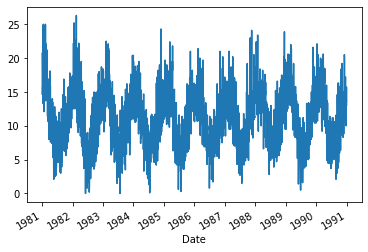

In [9]:
# create a line plot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

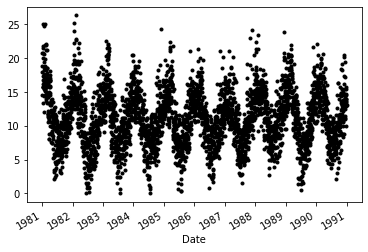

In [10]:
# create a dot plot
series.plot(style='k.')
pyplot.show()

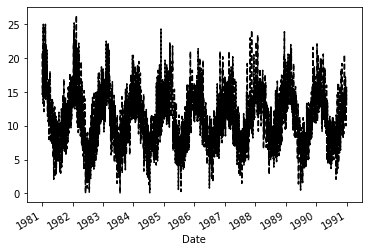

In [11]:
# create a dashed line plot
series.plot(style='k--')
pyplot.show()

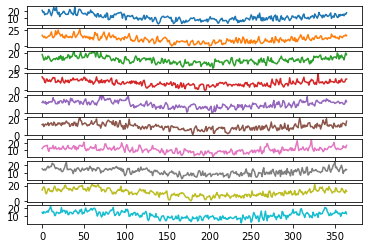

In [12]:
# create stacked line plots
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

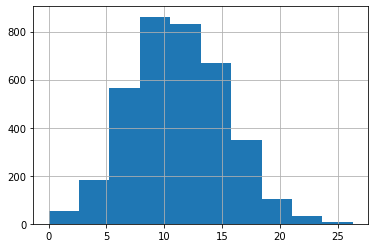

In [13]:
# create a histogram plot
series.hist()
pyplot.show()

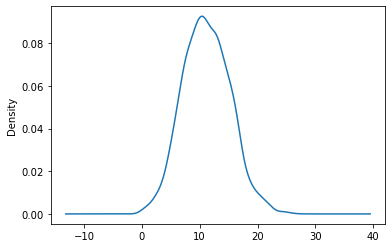

In [14]:
# create a density plot
series.plot(kind='kde')
pyplot.show()

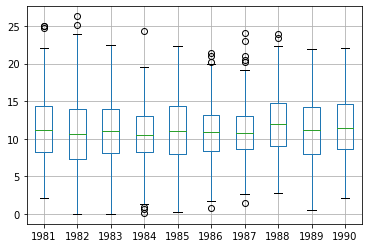

In [15]:
# create a boxplot of yearly data
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()

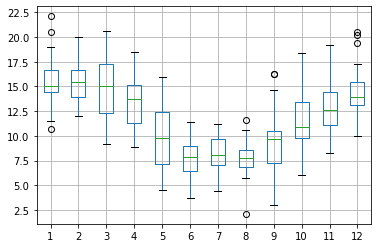

In [16]:
# create a boxplot of monthly data
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

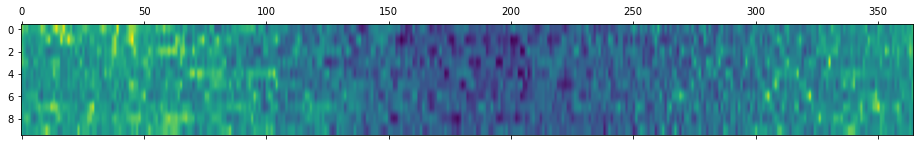

In [17]:
# create a heat map of yearly data
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

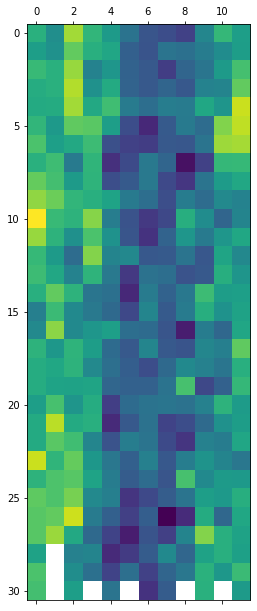

In [18]:
# create a heat map of monthly data
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

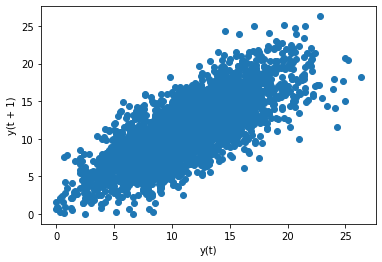

In [19]:
# create a scatter plot
lag_plot(series)
pyplot.show()

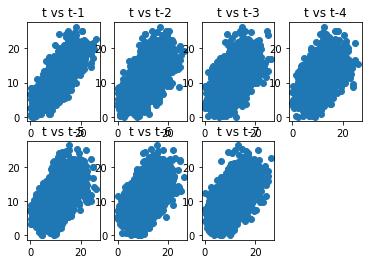

In [20]:
# create multiple scatter plots
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t vs t-' + str(i))
	pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

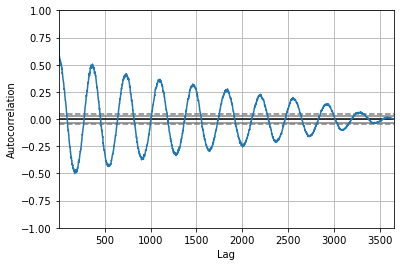

In [21]:
# create an autocorrelation plot
autocorrelation_plot(series)
pyplot.show()